In [129]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ds_salaries.csv")
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [130]:
# Wie viele Einträge hat das Dataset?
df.shape[1] # 607

12

In [131]:
# Welches sind die Top-3 Länder und wie viele Einträge haben sie jeweils?
top3 = df["salary_in_usd"].sort_values(ascending=False).head(3)
print(top3)
df["employee_residence"].value_counts().head(3)


252    600000
97     450000
33     450000
Name: salary_in_usd, dtype: int64


employee_residence
US    332
GB     44
IN     30
Name: count, dtype: int64

In [132]:
# Wie hoch ist das Durschnittseinkommen?
df["salary"].mean()

324000.0626029654

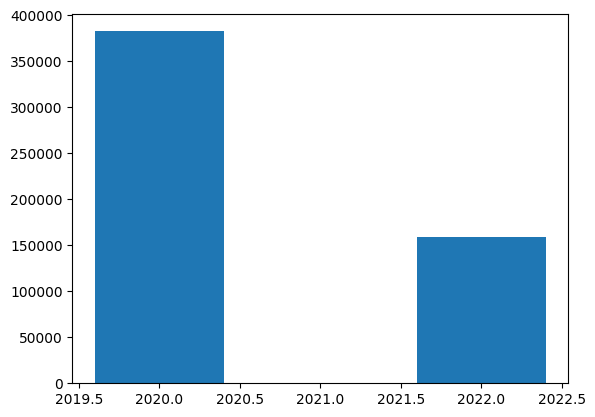

In [133]:
# Ist das Durchschnittseinkommen von 2020 bis 2022 gestiegen oder gefallen? Visualisieren Sie dies!
twenty_bool = df["work_year"] == 2020
first = df["salary"][twenty_bool].mean()
two_bool = df["work_year"] == 2022
second = df["salary"][two_bool].mean()

plt.bar([2020, 2022], [first, second])
plt.show()


In [134]:
# Es gibt Arbeitnehmer, die in einem anderem Land wohnen, als das in dem sie arbeiten:
#   - Wie viel Prozent der Arbeitnehmer betrifft dies?
percentage = (df[df["employee_residence"] != df["company_location"]].count().sum() / df.shape[1])
print("Anteil: " + str(percentage))

#   - verdienen sie mehr oder weniger als die NICHT-Pendler
money_pen = df["salary_in_usd"][df["employee_residence"] != df["company_location"]].mean()
money_non = df["salary_in_usd"][df["employee_residence"] == df["company_location"]].mean()
print(money_pen > money_non)

Anteil: 51.0
False


In [135]:
# Welcher Job verspricht das höchste Durschnittseinkommen (job_title)


In [136]:
# Wie hoch ist Durchschnittseinkommen, gruppiert nach Berufserfahrung
avg_money = df["salary_in_usd"].groupby(df["experience_level"]).mean()
print(avg_money)

experience_level
EN     61643.318182
EX    199392.038462
MI     87996.056338
SE    138617.292857
Name: salary_in_usd, dtype: float64


In [137]:
# Erstellen Sie zwei Grafiken zu diesem Dataset die interessant sein könnten